# Fraud Data

Recognizing fraudulent transactions from legitimate ones has been a challenge for businesses and individuals alike, as scammers continually find new ways to deceive the system. However, with the advent of advanced technologies like machine learning, this task can now be made much easier.

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.plotting.backend = "plotly"
import plotly.express as px
import seaborn as sns

In [106]:
df = pd.read_csv("Final Transactions.csv", index_col=0)
df.index = pd.to_datetime(df.index)

df.columns

Index(['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID',
       'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS', 'TX_FRAUD',
       'TX_FRAUD_SCENARIO'],
      dtype='object')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1754155 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.001754154
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TRANSACTION_ID     int64  
 1   TX_DATETIME        object 
 2   CUSTOMER_ID        int64  
 3   TERMINAL_ID        int64  
 4   TX_AMOUNT          float64
 5   TX_TIME_SECONDS    int64  
 6   TX_TIME_DAYS       int64  
 7   TX_FRAUD           int64  
 8   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 133.8+ MB


In [108]:
df.head(10)

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
1970-01-01 00:00:00.000000000,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1970-01-01 00:00:00.000000001,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
1970-01-01 00:00:00.000000002,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
1970-01-01 00:00:00.000000003,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
1970-01-01 00:00:00.000000004,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0
1970-01-01 00:00:00.000000005,5,2023-01-01 00:10:45,568,8803,401.17,645,0,0,0
1970-01-01 00:00:00.000000006,6,2023-01-01 00:11:30,2803,5490,938.54,690,0,0,0
1970-01-01 00:00:00.000000007,7,2023-01-01 00:11:44,4684,2486,206.53,704,0,0,0
1970-01-01 00:00:00.000000008,8,2023-01-01 00:11:53,4128,8354,253.47,713,0,0,0
1970-01-01 00:00:00.000000009,9,2023-01-01 00:13:44,541,6212,555.63,824,0,0,0


DATA LEGENDS:

TRANSACTION_ID
Unique identifier for the transaction

TX_DATETIME
Date and time at which the transaction occurs

CUSTOMER_ID
Unique identifier for the customer

TERMINAL_ID
Unique identifier for the terminal through which transaction took place

TX_AMOUNT
Amount of Transaction

TX_TIME_SECONDS
Seconds elapsed before the transaction

TX_TIME_DAYS
Seconds elapsed before the transaction

TX_FRAUD
A binary variable, with the value 0 for a legitimate transaction, or the value 1 for a fraudulent transaction.

TX_FRAUD_SCENARIO
A ternary variable depicting different fraudulent scenarios

# DATA CLEANING

In [109]:
df = df.drop_duplicates()
print(df.isna().sum())

TRANSACTION_ID       0
TX_DATETIME          0
CUSTOMER_ID          0
TERMINAL_ID          0
TX_AMOUNT            0
TX_TIME_SECONDS      0
TX_TIME_DAYS         0
TX_FRAUD             0
TX_FRAUD_SCENARIO    0
dtype: int64


In [145]:
object_cols = ["TX_DATETIME"]

for i in object_cols:
    print("column name : {}".format(i))
    print("Number of unique columns of ", i, ":{}".format(df[i].nunique()))
    print("Values of unique columns of ", i, "is below: \n{}".format(df[i].value_counts()))
    print("------------------------------------------------------------------------")

column name : TX_DATETIME
Number of unique columns of  TX_DATETIME :214611
Values of unique columns of  TX_DATETIME is below: 
2023-02-14 11:05:28    3
2023-06-24 06:14:15    3
2023-02-05 06:53:49    3
2023-02-08 11:33:27    3
2023-03-15 08:29:35    3
                      ..
2023-03-03 10:28:52    1
2023-03-03 10:29:10    1
2023-03-03 10:29:50    1
2023-03-03 10:30:24    1
2023-07-02 23:56:16    1
Name: TX_DATETIME, Length: 214611, dtype: int64
------------------------------------------------------------------------


In [126]:
df.describe()

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,month
count,2.359690e+05,235969.000000,235969.000000,235969.000000,2.359690e+05,235969.000000,235969.0,235969.000000,235969.000000
mean,8.804810e+05,2519.976480,4980.919515,1477.560343,7.933920e+06,91.327721,1.0,1.077718,3.556573
std,5.053730e+05,1458.627738,2884.721722,2973.502497,4.556081e+06,52.731309,0.0,0.333060,1.735726
min,2.000000e+00,0.000000,0.000000,0.200000,4.760000e+02,0.000000,1.0,1.000000,1.000000
25%,4.428240e+05,1252.000000,2492.000000,1085.040000,3.996473e+06,46.000000,1.0,1.000000,2.000000
50%,8.807540e+05,2530.000000,4963.000000,1212.470000,7.923149e+06,91.000000,1.0,1.000000,4.000000
75%,1.318060e+06,3781.000000,7476.000000,1410.640000,1.187945e+07,137.000000,1.0,1.000000,5.000000
max,1.754149e+06,4998.000000,9999.000000,647837.500000,1.581098e+07,182.000000,1.0,3.000000,7.000000


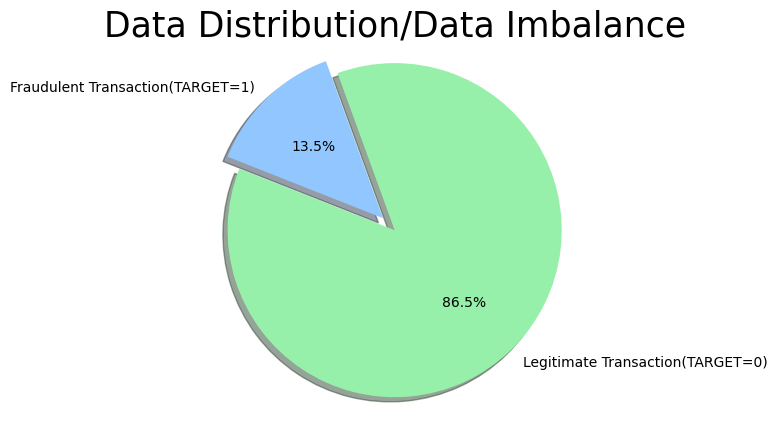

In [111]:
count1 = 0 
count0 = 0
for i in df['TX_FRAUD'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1
        
count1 = (count1/len(df['TX_FRAUD']))*100
count0 = (count0/len(df['TX_FRAUD']))*100

x = ['Fraudulent Transaction(TARGET=1)','Legitimate Transaction(TARGET=0)']
y = [count1, count0]


explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data Distribution/Data Imbalance',fontsize=25)
plt.show()

In [112]:
df = df[(df['TX_FRAUD_SCENARIO'] != 0) & (df['TX_AMOUNT'] != 0)]
grouped = df.groupby("TX_FRAUD_SCENARIO").size().reset_index(name="count")

fig = px.bar(grouped, x="TX_FRAUD_SCENARIO", y="count", color="TX_FRAUD_SCENARIO",
             labels={"TX_FRAUD_SCENARIO": "Fraud Scenario", "count": "Number of Transactions"})

fig.show()

In [148]:

df["month"] = pd.DatetimeIndex(df["TX_DATETIME"]).month

grouped = df.groupby(["month", "TX_FRAUD"]).size().reset_index(name="count")

fig = px.bar(grouped, x="month", y="count", color="TX_FRAUD", barmode="group",
             labels={"month": "Month", "count": "Number of Transactions", "TX_FRAUD": "Transaction Type"})

fig.show()

In [125]:
df.TX_FRAUD_SCENARIO.unique()

array([1, 3, 2])

In [114]:
df = df[(df['TX_FRAUD_SCENARIO'] != 0) & (df['TX_AMOUNT'] != 0)]

grouped = df.groupby('TX_FRAUD_SCENARIO')['TX_AMOUNT'].mean().reset_index(name='mean_amount')

fig = px.bar(grouped, x='TX_FRAUD_SCENARIO', y='mean_amount', labels={'TX_FRAUD_SCENARIO':'Fraud Scenario','mean_amount':'Average Transaction Amount'})

fig.show()

In [115]:

df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])

df['date'] = df['TX_DATETIME'].dt.date

grouped = df[df['TX_FRAUD'] == 1].groupby('date').size().reset_index(name='count')

fig = px.line(grouped, x='date', y='count', labels={'date':'Date','count':'Number of Fraud Transactions'})

fig.show()

/var/folders/h3/kfscfv014s7g3ky2rd6szqpm0000gn/T/ipykernel_11929/1892960247.py:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



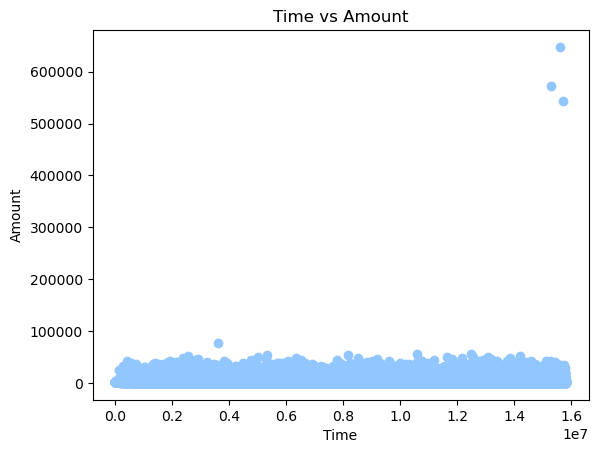

In [116]:

plt.style.use("seaborn-pastel")
plt.title("Time vs Amount")
plt.xlabel("Time")
plt.ylabel("Amount")
x = df.TX_TIME_SECONDS
y = df.TX_AMOUNT
plt.scatter(x,y)
plt.show()

In [119]:
df.corr()


/var/folders/h3/kfscfv014s7g3ky2rd6szqpm0000gn/T/ipykernel_11929/1886530979.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,month
TRANSACTION_ID,1.000000,0.000956,0.000982,0.005426,0.999998,0.999985,NaN,0.019352,0.985974
CUSTOMER_ID,0.000956,1.000000,0.001108,-0.006927,0.000956,0.000955,NaN,-0.015194,0.001107
TERMINAL_ID,0.000982,0.001108,1.000000,-0.001072,0.000975,0.000964,NaN,-0.010742,0.001071
TX_AMOUNT,0.005426,-0.006927,-0.001072,1.000000,0.005420,0.005406,NaN,0.409828,0.005060
TX_TIME_SECONDS,0.999998,0.000956,0.000975,0.005420,1.000000,0.999992,NaN,0.019339,0.985989
TX_TIME_DAYS,0.999985,0.000955,0.000964,0.005406,0.999992,1.000000,NaN,0.019339,0.985997
TX_FRAUD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TX_FRAUD_SCENARIO,0.019352,-0.015194,-0.010742,0.409828,0.019339,0.019339,NaN,1.000000,0.017828
month,0.985974,0.001107,0.001071,0.005060,0.985989,0.985997,NaN,0.017828,1.000000


In [120]:
import seaborn as sns

/var/folders/h3/kfscfv014s7g3ky2rd6szqpm0000gn/T/ipykernel_11929/3726960614.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



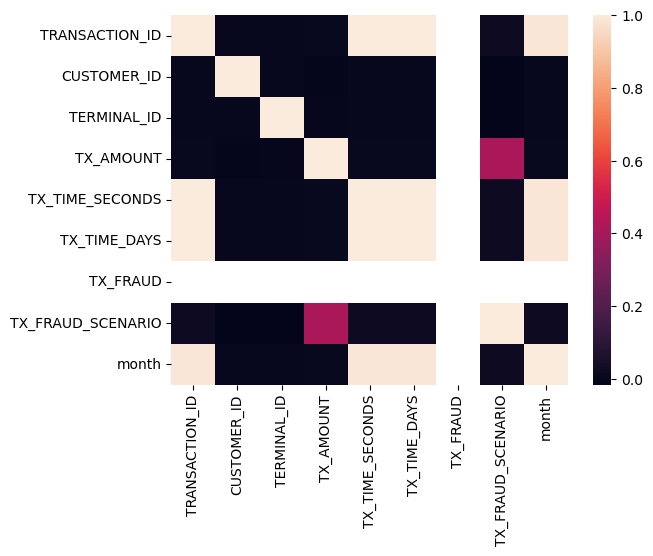

In [121]:
corr_heatmap = sns.heatmap(df.corr())


In [136]:
import math
col = df['TX_AMOUNT']
summation_col = col.apply(lambda x: (x-col.mean())**2).sum()

stdev = math.sqrt(summation_col/len(col))
stdev

2973.4961965780835

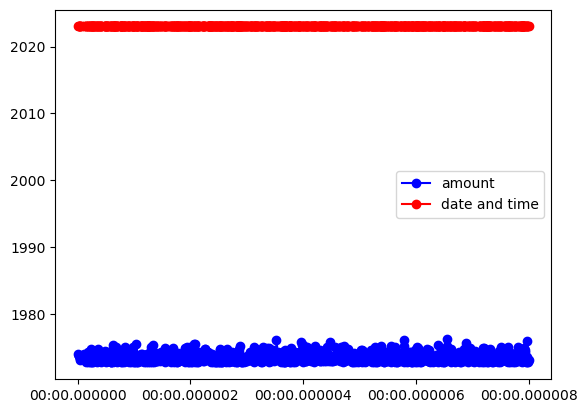

In [122]:
plt.plot(df.TX_AMOUNT.head(1000),marker='o',label='amount',color='blue')
plt.plot(df.TX_DATETIME.head(1000),marker='o',label='date and time',color='red')
plt.legend()
plt.show()

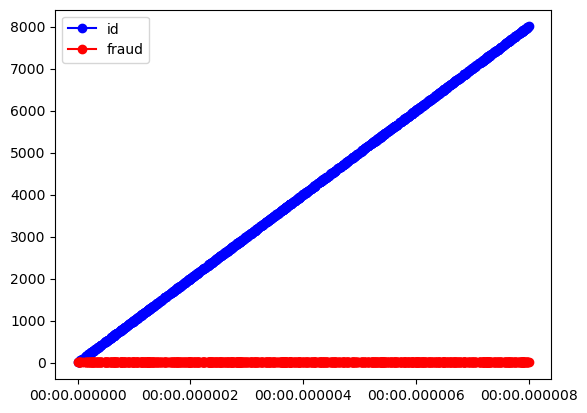

In [123]:
plt.plot(df.TRANSACTION_ID.head(1000),marker='o',label='id',color='blue')
plt.plot(df.TX_FRAUD.head(1000),marker='o',label='fraud',color='red')
plt.legend()
plt.show()

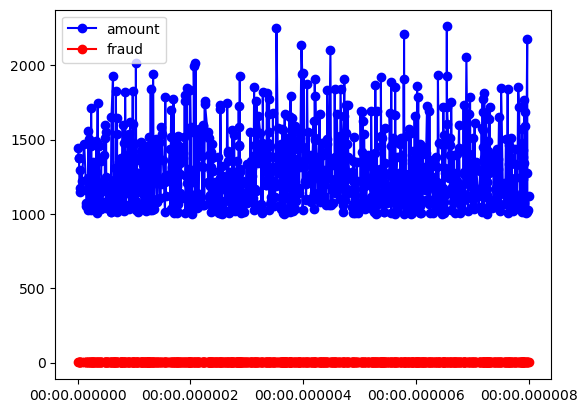

In [127]:
col=df.columns.values
plt.plot(df.TX_AMOUNT.head(1000),marker='o',label='amount',color='blue')
plt.plot(df.TX_FRAUD.head(1000),marker='o',label='fraud',color='red')
plt.legend()
plt.show()


In [141]:
df['z_scores']=(df.TX_AMOUNT-df.TX_AMOUNT.mean())/(df.TX_AMOUNT.std())
df=df[(df['z_scores']>-3)&(df['z_scores']<3)]
q1=df.TX_AMOUNT.quantile(0.25)
q3=df.TX_AMOUNT.quantile(0.75)
iqr=q3-q1
up=q3+1.5*iqr
lo=q1-1.5*iqr
df=df[(df.TX_AMOUNT <up)& (df.TX_AMOUNT >lo)]
df['z_scores']=(df.TX_AMOUNT-df.TX_AMOUNT.mean())/(df.TX_AMOUNT.std())
df=df[(df['z_scores']>-3)&(df['z_scores']<3)]
q_1=df.TX_AMOUNT.quantile(0.25)
q_3=df.TX_AMOUNT.quantile(0.75)
Iqr=q_3-q_1
print(Iqr)
upp=q_3+1.5*Iqr
low=q_1-1.5*Iqr
df=df[(df.TX_AMOUNT <upp)& (df.TX_AMOUNT >low)]
qa_1=df.TX_AMOUNT.quantile(0.25)
qa_3=df.TX_AMOUNT.quantile(0.75)
IQr=qa_3-qa_1
upper=qa_3+1.5*IQr
lower=qa_1-1.5*IQr
df=df[(df.TX_AMOUNT <upper)& (df.TX_AMOUNT >lower)]
df

287.78


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,month,date,z_scores
1970-01-01 00:00:00.000000002,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1,1,2023-01-01,0.970805
1970-01-01 00:00:00.000000020,20,2023-01-01 00:21:09,1270,931,1378.62,1269,0,1,1,1,2023-01-01,0.648896
1970-01-01 00:00:00.000000023,23,2023-01-01 00:25:24,508,9687,1376.93,1524,0,1,1,1,2023-01-01,0.640438
1970-01-01 00:00:00.000000035,35,2023-01-01 00:31:51,1753,8676,1145.15,1911,0,1,1,1,2023-01-01,-0.519578
1970-01-01 00:00:00.000000043,43,2023-01-01 00:34:45,3425,2930,1177.45,2085,0,1,1,1,2023-01-01,-0.357922
...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.001754108,1754108,2023-07-02 23:30:43,263,3347,1391.61,15809443,182,1,1,7,2023-07-02,0.713908
1970-01-01 00:00:00.001754126,1754126,2023-07-02 23:41:44,1931,4700,1013.15,15810104,182,1,1,7,2023-07-02,-1.180213
1970-01-01 00:00:00.001754137,1754137,2023-07-02 23:48:18,3173,2155,1257.82,15810498,182,1,1,7,2023-07-02,0.044314
1970-01-01 00:00:00.001754142,1754142,2023-07-02 23:52:26,1545,1908,1272.09,15810746,182,1,1,7,2023-07-02,0.115733


In [143]:
quantile1 = df['TX_AMOUNT'].quantile(0.25)
quantile3 = df['TX_AMOUNT'].quantile(0.75)
IQR = quantile3 - quantile1
IQR

287.76

In [144]:
lower_bound = quantile1 - 1.5*IQR
upper_bound = quantile3 + 1.5*IQR
df['TX_AMOUNT'][(df['TX_AMOUNT'] > lower_bound) & (df['TX_AMOUNT'] < upper_bound)]

1970-01-01 00:00:00.000000002    1442.94
1970-01-01 00:00:00.000000020    1378.62
1970-01-01 00:00:00.000000023    1376.93
1970-01-01 00:00:00.000000035    1145.15
1970-01-01 00:00:00.000000043    1177.45
                                  ...   
1970-01-01 00:00:00.001754108    1391.61
1970-01-01 00:00:00.001754126    1013.15
1970-01-01 00:00:00.001754137    1257.82
1970-01-01 00:00:00.001754142    1272.09
1970-01-01 00:00:00.001754149    1042.11
Name: TX_AMOUNT, Length: 216541, dtype: float64